# Combining Data

## Imports

In [1]:
#defaults python
import os
import glob
import math
import ast
import statistics
import requests
import json
import io
import datetime
from dateutil import parser
from multiprocessing.dummy import Pool
import urllib3
from requests.adapters import HTTPAdapter
from datetime import datetime, timedelta
from collections import Counter
from itertools import chain

# datascience imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite


from scipy.sparse import linalg
import scipy.stats

from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation, \
                MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, OPTICS

from sklearn.decomposition import PCA

from sklearn.random_projection import GaussianRandomProjection

from sklearn import metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score,  \
                        calinski_harabasz_score, homogeneity_score

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.svm import LinearSVC

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from tqdm.autonotebook import tqdm

#graphical imports
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors 
%matplotlib inline

import plotly
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import io as plotlyio

from mpl_toolkits.mplot3d import Axes3D 

In [34]:
# !conda install scikit-learn

## Read CSVs


In [35]:
csvfilelist = []
for root, dirs, files in os.walk("../generateddata"):
    csvfilelist = csvfilelist + glob.glob(root+'/*.csv')

Listing all CSVs for easy checking if they are in the folder or not.

In [36]:
csvfilelist

['../generateddata/scenario_clusters.csv',
 '../generateddata/xsd.csv',
 '../generateddata/QAS_calinski_Property_clusters.csv',
 '../generateddata/QAScomplexity-mappings-xml.csv',
 '../generateddata/QAS_highclusters_WSDL-xsd_clusters.csv',
 '../generateddata/WSDL_clusters.csv',
 '../generateddata/QAS_calinski_WSDL-xsd_clusters.csv',
 '../generateddata/QAS_new_v2_clusters_Groovy_clusters.csv',
 '../generateddata/iFlow_clusters.csv',
 '../generateddata/QAS_highclusters_Groovy_clusters.csv',
 '../generateddata/QAS_highclusters_iFlow_clusters.csv',
 '../generateddata/QAS_highclusters_Property_clusters.csv',
 '../generateddata/QAS_new_v2_clusters_WSDL_clusters.csv',
 '../generateddata/WSDL-xsd_clusters.csv',
 '../generateddata/qasmapping_combinations.csv',
 '../generateddata/Property_clusters.csv',
 '../generateddata/ratiobinnedpred.csv',
 '../generateddata/mapping_combinations.csv',
 '../generateddata/qasgroovy.csv',
 '../generateddata/QAS_highclusters_scenario_clusters.csv',
 '../generate

In [2]:
prefix = "../generateddata/"

## Scenario's

In [3]:
scenariodf = pd.read_csv(prefix+"qasscenariofilecombination.csv")
scenariodf.drop(columns=["Unnamed: 0"], inplace=True)
# scenariodf.head()

In [6]:
scenariodf['scenarioid'].max()

455

In [7]:
lookupdict_file_scenarioid = {}
lookupdict_filename_scenarioid = {}
lookupdict_scenario_scenarioid = {}
lookupdict_file_fileid={}
lookupdict_filepath_fileid= {}
lookupdict_scenarioid_scenario = {}
for i in scenariodf.iterrows():
    scenario = i[1][0]
    file = i[1][1]
    scenarioid = i[1][2]
    fileid = i[1][3]
    filename = i[1][4]
    lookupdict_file_scenarioid.update({file:scenarioid})
    lookupdict_filename_scenarioid.update({filename:scenarioid})
    lookupdict_scenario_scenarioid.update({scenario:scenarioid})
    lookupdict_scenarioid_scenario.update({scenarioid:scenario})
    lookupdict_file_fileid.update({filename:fileid})
    lookupdict_filepath_fileid.update({file:fileid})
    
    
filepath_to_scenarioid = lambda x: lookupdict_file_scenarioid.get(x)
filename_to_scenarioid = lambda x: lookupdict_filename_scenarioid.get(x)
scenario_to_scenarioid = lambda x: lookupdict_scenario_scenarioid.get(x)
filename_to_fileid = lambda x: lookupdict_file_fileid.get(x)
filepath_to_fileid = lambda x: lookupdict_filepath_fileid.get(x)
scenarioid_to_scenario = lambda x: lookupdict_scenarioid_scenario.get(x)

In [8]:
# filename_to_fileid(dfmapping_complexity.iloc(0)[0][0])

In [9]:
import json
with open('scenario_to_scenarioid.json', 'w') as fp:
    json.dump(lookupdict_scenario_scenarioid, fp)

## XSD Complexities

In [10]:
dfcomplexity_xsd = pd.read_csv(prefix+"qascomplexity-xsd.csv")
dfcomplexity_xsd.drop(columns=["Unnamed: 0"], inplace=True)
dfcomplexity_xsd['scenario'] = dfcomplexity_xsd['file'].apply(filepath_to_scenarioid)
dfcomplexity_xsd['fileid'] = dfcomplexity_xsd['file'].apply(filepath_to_fileid)
dfcomplexity_xsd.drop(columns=["file"], inplace=True)
dfcomplexity_xsd = dfcomplexity_xsd.fillna(0)
dfcomplexity_xsd.head()

,complexity,size_complexity,concept_complexity,name_complexity,scenario,fileid
0,0.463260,0.981498,0.272727,0.135556,1,16
1,0.418045,0.994060,0.090909,0.169167,3,28
2,0.435673,0.949610,0.194444,0.162963,4,35
3,0.416243,0.999964,0.000000,0.248765,7,54
4,0.407157,0.999945,0.000000,0.221528,7,55


In [11]:
dfcomplexity_xsd['complexity'].describe()

count    449.000000
mean       0.353269
std        0.213159
min        0.000000
25%        0.182424
50%        0.345866
75%        0.500925
max        0.741486
Name: complexity, dtype: float64

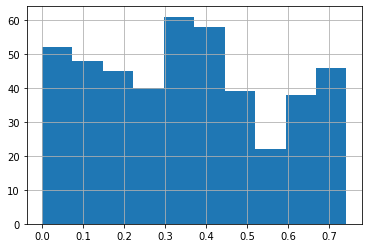

In [12]:
xsdcomplexityhistfig = dfcomplexity_xsd['complexity'].hist()
xsdcomplexityhistfig = xsdcomplexityhistfig.get_figure()
xsdcomplexityhistfig.savefig("./xsdcomplexityhistfig.png")

In [13]:
fig = px.histogram(dfcomplexity_xsd, x="complexity", y="fileid")
fig.show()

In [14]:
print(dfcomplexity_xsd.isna().sum())

complexity            0
size_complexity       0
concept_complexity    0
name_complexity       0
scenario              0
fileid                0
dtype: int64


## Mapping Complexities

In [15]:
dfmapping_complexity = pd.read_csv(prefix+"qasmapping_complexity.csv")
dfmapping_complexity.drop(columns=["Unnamed: 0"], inplace=True)
dfmapping_complexity = dfmapping_complexity.drop_duplicates()
dfmapping_complexity.reset_index(inplace=True)
dfmapping_complexity.drop(columns=["index"], inplace=True)
dfmapping_complexity['scenario'] = dfmapping_complexity['file'].apply(filename_to_scenarioid)
dfmapping_complexity['fileid'] = dfmapping_complexity['file'].apply(filename_to_fileid)
dfmapping_complexity.drop(columns=["file"], inplace=True)
dfmapping_complexity.head()

,mapping_complexity,scenario,fileid
0,0.474467,7,57
1,0.516861,375,167
2,0.439316,30,325
3,0.470497,30,326
4,0.417094,30,327


In [16]:
dfmmap = pd.read_csv(prefix+"/QASmmap-stats.csv")
dfmmap.drop(columns=["Unnamed: 0"], inplace=True)
dfmmap = dfmmap.drop_duplicates()
dfmmap.reset_index(inplace=True)
dfmmap.drop(columns=["index"], inplace=True)
dfmmap['scenario'] = dfmmap['file'].apply(filepath_to_scenarioid)
dfmmap['fileid'] = dfmmap['file'].apply(filepath_to_fileid)
dfmmap.drop(columns=["file"], inplace=True)
dfmmap.sort_values(by=['size_complexity', 'name_complexity'], ascending=False, inplace=True)
dfmmap.head(20)

,bricks,sources,size_complexity,name_complexity,scenario,fileid
390,27110,27169,1.000000,0.419333,254,2743
391,27110,27169,1.000000,0.419333,254,2744
526,27110,27169,1.000000,0.419333,343,3669
527,27110,27169,1.000000,0.419333,343,3670
546,30756,30784,1.000000,0.336667,351,3783
548,30757,30785,1.000000,0.336667,351,3785
388,27110,27144,1.000000,0.336250,254,2741
524,27110,27144,1.000000,0.336250,343,3667
547,30757,30785,1.000000,0.304630,351,3784
195,2317,14947,1.000000,1.000000,132,1422


In [17]:
winsor = dfmmap.bricks.values
win_edit = scipy.stats.mstats.winsorize(winsor, limits=[0.06, 0.06])

print(min(winsor), min(win_edit))
print(max(winsor), max(win_edit))

0 0
30757 943


In [18]:
winsor = dfmmap.sources.values
win_edit = scipy.stats.mstats.winsorize(winsor, limits=[0.06, 0.06])

print(min(winsor), min(win_edit))
print(max(winsor), max(win_edit))

0 0
30785 1299


In [19]:
dfmmap.describe()

,bricks,sources,size_complexity,name_complexity,scenario,fileid
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,663.571625,673.435262,0.189785,0.262346,234.315427,2500.685950
std,3387.305816,3359.790633,0.267399,0.337922,129.790828,1375.455906
min,0.000000,0.000000,0.016954,0.000000,0.000000,5.000000
25%,0.000000,0.000000,0.018198,0.000000,121.500000,1304.250000
50%,12.000000,19.000000,0.068031,0.092045,247.000000,2587.500000
75%,48.000000,110.750000,0.215382,0.347009,349.750000,3732.250000
max,30757.000000,30785.000000,1.000000,1.000000,455.000000,4802.000000


## Reuse

In [20]:
dfreuse = pd.read_csv(prefix+"qasreuse.csv")
dfreuse.drop(columns=["Unnamed: 0"], inplace=True)
dfreuse['scenario'] = dfreuse['file'].apply(filepath_to_scenarioid)
dfreuse['fileid'] = dfreuse['file'].apply(filepath_to_fileid)
dfreuse.drop(columns=["file"], inplace=True)
dfreuse.head()

,reuse,scenario,fileid
0,0.083333,1,16
1,0.076923,3,28
2,0.090909,4,35
3,0.040000,7,54
4,0.041667,7,55


In [21]:
dfreusecomplexity = pd.merge(left=dfcomplexity_xsd, right=dfreuse, on=["scenario","fileid"])
dfreusecomplexity.head()
# dfreusecomplexity.to_csv("test.csv")

,complexity,size_complexity,concept_complexity,name_complexity,scenario,fileid,reuse
0,0.463260,0.981498,0.272727,0.135556,1,16,0.083333
1,0.418045,0.994060,0.090909,0.169167,3,28,0.076923
2,0.435673,0.949610,0.194444,0.162963,4,35,0.090909
3,0.416243,0.999964,0.000000,0.248765,7,54,0.040000
4,0.407157,0.999945,0.000000,0.221528,7,55,0.041667


In [22]:
for i in dfreuse.iterrows():
    row = i[1]
    if not row['scenario'] in dfcomplexity_xsd.scenario.values and not row['fileid'] in dfcomplexity_xsd.fileid.values:
        print(i)    

(11, reuse         0.333333
scenario     17.000000
fileid      134.000000
Name: 11, dtype: float64)


## BPMN Complexities

In [23]:
threshold = 0.001
dfbpmn_complexity = pd.read_csv(prefix+"qasbpmn_complexity.csv")
dfbpmn_complexity.drop(columns=["Unnamed: 0"], inplace=True)
# print("Col count: {}".format(len(dfbpmn_complexity.columns)))
dfbpmn_complexity = dfbpmn_complexity.drop(dfbpmn_complexity.std()\
                       [dfbpmn_complexity.std() < threshold].index.values, axis=1)
dfbpmn_complexity['scenario'] = dfbpmn_complexity['file'].apply(filepath_to_scenarioid)
dfbpmn_complexity['fileid'] = dfbpmn_complexity['file'].apply(filepath_to_fileid)
dfbpmn_complexity.drop(columns=["file"], inplace=True)
# dfbpmn_complexity.dropna(thresh=3, axis=1, inplace=True)
# print("Col count: {}".format(len(dfbpmn_complexity.columns)))
dfbpmn_complexity.head()

,AverageGatewayDegree_metric,CoefficientOfNetworkComplexity_metric,DurfeeSquare_metric,GatewayHeterogenity_metric,NOAC_metric,NOAJS_metric,NOA_metric,NumberOfNodes_metric,PerfectSquare_metric,TNEE_metric,TNE_metric,TNSE_metric,all_activities_count,all_control_flow_elements_count,all_events_count,all_gateways_count,scenario,fileid
0,NaN,1.000000,3,0,2,0,0,2,3,1,2,1,0,2,2,0,0,4
1,NaN,0.700000,2,0,5,1,1,5,2,2,4,2,1,4,4,0,1,17
2,NaN,0.875000,2,0,2,0,0,2,2,1,2,1,0,2,2,0,2,23
3,3.0,0.769231,4,1,12,3,2,12,4,5,9,4,2,10,9,1,3,29
4,NaN,0.750000,2,0,5,1,1,5,2,2,4,2,1,4,4,0,4,36


In [24]:
dfbpmn_complexity.describe()

,AverageGatewayDegree_metric,CoefficientOfNetworkComplexity_metric,DurfeeSquare_metric,GatewayHeterogenity_metric,NOAC_metric,NOAJS_metric,NOA_metric,NumberOfNodes_metric,PerfectSquare_metric,TNEE_metric,TNE_metric,TNSE_metric,all_activities_count,all_control_flow_elements_count,all_events_count,all_gateways_count,scenario,fileid
count,217.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.00000,456.000000
mean,3.362681,0.885157,2.682018,0.557018,8.774123,1.673246,0.532895,8.774123,3.570175,4.118421,7.100877,2.982456,0.532895,8.241228,7.100877,1.140351,230.91886,2322.131579
std,0.999185,0.098864,1.032326,0.640257,10.496858,2.693220,1.128557,10.496858,1.727448,4.827487,8.051122,3.390309,1.128557,9.608086,8.051122,1.960611,130.73962,1404.304327
min,3.000000,0.250000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.00000,4.000000
25%,3.000000,0.840000,2.000000,0.000000,2.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,2.000000,2.000000,0.000000,120.75000,1149.250000
50%,3.000000,0.876276,2.000000,0.000000,4.000000,1.000000,0.000000,4.000000,3.000000,2.000000,4.000000,1.000000,0.000000,4.000000,4.000000,0.000000,231.50000,2260.500000
75%,3.166667,0.909091,3.000000,1.000000,11.000000,2.000000,1.000000,11.000000,4.000000,5.000000,9.000000,4.000000,1.000000,10.000000,9.000000,1.000000,344.00000,3548.000000
max,11.500000,1.357143,6.000000,2.000000,76.000000,19.000000,11.000000,76.000000,8.000000,30.000000,57.000000,27.000000,11.000000,65.000000,57.000000,14.000000,455.00000,4800.000000


In [61]:
# colmaxlist = []
# for col in dfbpmn_complexity.columns:
#     colmaxlist.append(dfbpmn_complexity[col].max())
    
# # print(colmaxdict)
# for row in dfbpmn_complexity.iterrows():
# #     print(row[1])
#     localcomplexity = 0
#     for i in range(1,len(row[1][1:-2])):
#         localcomplexity += (row[1][i]/colmaxlist[i])
# #         print(row[1][i])
# #         print("max: {}".format(colmaxlist[i]))
# #     print(dfbpmn_complexity)
#     localcomplexity = localcomplexity / len(row[1][1:-2])
#     print(localcomplexity)
# #     break
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

normdfbpmn = normalize(dfbpmn_complexity)
# normdfbpmn.describe()

def bpmncomplexity(row):
#     print(row)
    localcomplexity = 0
    for i in range(1,len(normdfbpmn.columns[1:-2])):
        localcomplexity += row[normdfbpmn.columns[i]]
#         print(row[1][i])
#         print("max: {}".format(colmaxlist[i]))
#     print(dfbpmn_complexity)
    localcomplexity = localcomplexity / len(row[1:-2])
#     print(localcomplexity)
#     normdfbpmn.iloc[row[0]]['complexity'] = localcomplexity
    return localcomplexity
#     break

In [62]:
normdfbpmn['complexity'] = normdfbpmn.apply(lambda x: bpmncomplexity(x), axis=1)

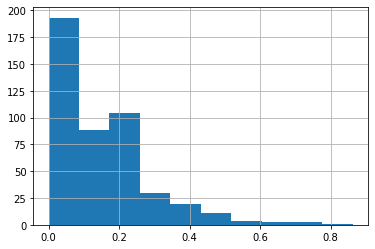

In [63]:
normdfbpmnhistfig = normdfbpmn['complexity'].hist()
normdfbpmnfig = normdfbpmnhistfig.get_figure()
normdfbpmnfig.savefig("./normdfbpmnhistfig.png")

In [64]:
fig = px.histogram(normdfbpmn, x="complexity", y="fileid",range_x=[0,1],nbins=10, template="plotly")
fig.show()

In [65]:
# trace3 = [go.Histogram(
#     x=normdfbpmn['complexity'],
#     xbins=dict(
#         start=0,
#         end=1,
#         size=0.1),
#     autobinx = False
# )]
# # fig = tools.make_subplots(rows=3, cols=2)
# # fig.append_trace(trace3, 2, 2)
# py.iplot(trace3, filename='cumulative histogram', renderer='chrome')

## WSDL-XSD Complexities

In [25]:
dfwsdl_xsdcomplexity = pd.read_csv(prefix+"qaswsdl-xsdcomplexity.csv")
dfwsdl_xsdcomplexity.drop(columns=["Unnamed: 0"], inplace=True)
dfwsdl_xsdcomplexity['scenario'] = dfwsdl_xsdcomplexity['file'].apply(filepath_to_scenarioid)
dfwsdl_xsdcomplexity['fileid'] = dfwsdl_xsdcomplexity['file'].apply(filepath_to_fileid)
dfwsdl_xsdcomplexity.drop(columns=["file"], inplace=True)
dfwsdl_xsdcomplexity.head()

,complexity,size_complexity,concept_complexity,name_complexity,scenario,fileid
0,0.395995,0.0,0.187986,1.00000,0,0
1,0.389012,0.0,0.167035,1.00000,0,1
2,0.401254,0.0,0.203763,1.00000,0,2
3,0.395995,0.0,0.187986,1.00000,0,3
4,0.082639,0.0,0.166667,0.08125,1,14


## WSDL DW APO OPS

In [26]:
dfwsdl = pd.read_csv(prefix+"qaswsdl_DWAPOOPS.csv")
dfwsdl.drop(columns=["Unnamed: 0"], inplace=True)
dfwsdl['scenario'] = dfwsdl['file'].apply(filepath_to_scenarioid)
dfwsdl['fileid'] = dfwsdl['file'].apply(filepath_to_fileid)
dfwsdl.drop(columns=["file"], inplace=True)
dfwsdl.head()

,DW,APO,OPS,scenario,fileid
0,3,0.333333,6.0,440,4625
1,3,0.333333,6.0,45,472
2,3,1.000000,3.0,0,1
3,3,1.000000,2.0,324,3524
4,3,1.000000,2.0,324,3523


In [68]:
winsor = dfwsdl.DW.values
lim = 0.13
win_edit = scipy.stats.mstats.winsorize(winsor, limits=[0, lim])

print(min(winsor), min(win_edit))
print(max(winsor), max(win_edit))

0 0
181 9


In [69]:
winsor = dfwsdl.OPS.values
lim = 0.15
win_edit = scipy.stats.mstats.winsorize(winsor, limits=[0, lim])

print(min(winsor), min(win_edit))
print(max(winsor), max(win_edit))

1.0 1.0
126.0 6.0


In [70]:
dfwsdl.describe()

,DW,APO,OPS,scenario,fileid
count,471.000000,471.000000,471.000000,471.000000,471.000000
mean,17.356688,0.997169,9.552017,237.333333,2520.036093
std,41.149341,0.043396,20.636630,129.393714,1372.255922
min,0.000000,0.333333,1.000000,0.000000,1.000000
25%,1.000000,1.000000,2.000000,132.000000,1409.000000
50%,3.000000,1.000000,2.000000,233.000000,2472.000000
75%,5.000000,1.000000,3.000000,358.000000,3796.500000
max,181.000000,1.000000,126.000000,455.000000,4796.000000


## Property Definitions

In [27]:
dfpropdef = pd.read_csv(prefix+"qaspropdef.csv")
dfpropdef.drop(columns=["Unnamed: 0"], inplace=True)
dfpropdef['scenario'] = dfpropdef['file'].apply(filepath_to_scenarioid)
dfpropdef['fileid'] = dfpropdef['file'].apply(filepath_to_fileid)
dfpropdef.drop(columns=["file"], inplace=True)
dfpropdef.dropna(axis='columns', how="all", inplace=True)

names = dfpropdef['name'].unique()
mapnames = dict(zip(names,range(len(names))))
dfpropdef['name'] = dfpropdef['name'].map(mapnames)

ptype = dfpropdef['type'].unique()
maptype = dict(zip(ptype,range(len(ptype))))
dfpropdef['type'] = dfpropdef['type'].map(maptype)

dfpropdef['isRequired'] = dfpropdef['isRequired'].apply(lambda x: 0 if x == False else 1)

dfpropdef.head()

,name,type,isRequired,scenario,fileid
0,0,0,0,0,13
1,1,0,0,0,13
2,2,0,0,0,13
3,3,0,0,0,13
4,4,0,0,0,13


## Groovy

In [28]:
dfgroovy = pd.read_csv(prefix+"qasgroovy.csv")
dfgroovy.drop(columns=["Unnamed: 0"], inplace=True)
dfgroovy['scenario'] = dfgroovy['filepath'].apply(filepath_to_scenarioid)
dfgroovy['fileid'] = dfgroovy['filepath'].apply(filepath_to_fileid)
dfgroovy.drop(columns=["filepath"], inplace=True)


dfgroovy.head()

,comments,singlelinecomments,defines,imports,linecount,whitelines,linesofcode,scenario,fileid
0,17,2,3,2,40,12,9,0,6
1,16,1,3,2,30,4,9,0,7
2,0,5,13,1,85,14,66,0,8
3,13,2,3,2,29,2,12,0,9
4,0,1,3,3,13,4,8,0,10


In [29]:
dfgroovymetrics = pd.read_csv(prefix+"qasgroovymetrics.csv")
dfgroovymetrics.drop(columns=["Unnamed: 0"], inplace=True)
dfgroovymetrics['scenario'] = dfgroovymetrics['file'].apply(filepath_to_scenarioid)
dfgroovymetrics['fileid'] = dfgroovymetrics['file'].apply(filepath_to_fileid)
dfgroovymetrics.drop(columns=["file"], inplace=True)


dfgroovymetrics.head()

,abcscore,comments,cycloscore,defines,imports,linecount,linesofcode,nestedscore,paramscore,singlelinecomments,whitelines,scenario,fileid
0,0.0,17.0,0,3.0,2.0,40.0,9.0,0,0,2.0,12.0,0,6
1,0.0,16.0,0,3.0,2.0,30.0,9.0,0,0,1.0,4.0,0,7
2,0.0,0.0,0,13.0,1.0,85.0,66.0,0,0,5.0,14.0,0,8
3,0.0,13.0,0,3.0,2.0,29.0,12.0,0,0,2.0,2.0,0,9
4,0.0,0.0,0,3.0,3.0,13.0,8.0,0,0,1.0,4.0,0,10


In [74]:
dfgroovymetrics.describe()

,abcscore,comments,cycloscore,defines,imports,linecount,linesofcode,nestedscore,paramscore,singlelinecomments,whitelines,scenario,fileid
count,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000
mean,1.667415,7.959358,0.200000,2.105882,1.439216,19.327629,7.650980,0.046702,0.070232,0.982531,2.734759,224.052406,2351.890553
std,5.200175,7.812701,1.317175,3.028959,1.691938,21.076637,13.074778,0.424332,0.269175,1.981021,4.400455,133.283507,1412.754896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,1098.000000
50%,0.000000,12.000000,0.000000,2.000000,2.000000,27.000000,9.000000,0.000000,0.000000,1.000000,2.000000,221.000000,2311.000000
75%,0.000000,16.000000,0.000000,3.000000,2.000000,28.000000,9.000000,0.000000,0.000000,1.000000,3.000000,342.000000,3585.000000
max,89.400000,25.000000,43.000000,90.000000,14.000000,415.000000,344.000000,9.000000,2.000000,31.000000,73.000000,455.000000,4808.000000


## Dataframes

In [75]:
# dfcomplexity_xsd
# dfmapping_complexity
# dfreuse
# dfbpmn_complexity
# dfwsdl_xsdcomplexity
# dfwsdl
# dfpropdef
# dfgroovy

In [76]:
dfbpmn_complexity.dropna(axis='columns', how='any', inplace=True)

In [77]:
dfwsdl.dropna(how='any', inplace=True)

In [78]:
dfwsdl_xsdcomplexity.dropna(how='any', inplace=True)

In [79]:
dfreusecomplexity.dropna(how='any', inplace=True)

In [165]:
wsdlresultdf = pd.merge(dfwsdl_xsdcomplexity, dfwsdl, how='outer', on=["scenario", "fileid"])
wsdlresultdf.head()

,complexity,size_complexity,concept_complexity,name_complexity,scenario,fileid,DW,APO,OPS
0,0.395995,0.0,0.187986,1.00000,0,0,NaN,NaN,NaN
1,0.389012,0.0,0.167035,1.00000,0,1,3.0,1.0,3.0
2,0.401254,0.0,0.203763,1.00000,0,2,NaN,NaN,NaN
3,0.395995,0.0,0.187986,1.00000,0,3,NaN,NaN,NaN
4,0.082639,0.0,0.166667,0.08125,1,14,NaN,NaN,NaN


In [192]:
for d in listofdfs:
    print(d.head(5).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  complexity &  size\_complexity &  concept\_complexity &  name\_complexity &  scenario &  fileid \\
\midrule
0 &    0.463260 &         0.981498 &            0.272727 &         0.135556 &         1 &      16 \\
1 &    0.418045 &         0.994060 &            0.090909 &         0.169167 &         3 &      28 \\
2 &    0.435673 &         0.949610 &            0.194444 &         0.162963 &         4 &      35 \\
3 &    0.416243 &         0.999964 &            0.000000 &         0.248765 &         7 &      54 \\
4 &    0.407157 &         0.999945 &            0.000000 &         0.221528 &         7 &      55 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrr}
\toprule
{} &  bricks &  sources &  size\_complexity &  name\_complexity &  scenario &  fileid \\
\midrule
390 &   27110 &    27169 &              1.0 &         0.419333 &       254 &    2743 \\
391 &   27110 &    27169 &              1.0 &         0.419333 &       254 &    2744 \\
526 &   2711

In [193]:
dfbpmn_complexity.head(10)

,CoefficientOfNetworkComplexity_metric,DurfeeSquare_metric,GatewayHeterogenity_metric,NOAC_metric,NOAJS_metric,NOA_metric,NumberOfNodes_metric,PerfectSquare_metric,TNEE_metric,TNE_metric,TNSE_metric,all_activities_count,all_control_flow_elements_count,all_events_count,all_gateways_count,scenario,fileid
0,1.000000,3,0,2,0,0,2,3,1,2,1,0,2,2,0,0,4
1,0.700000,2,0,5,1,1,5,2,2,4,2,1,4,4,0,1,17
2,0.875000,2,0,2,0,0,2,2,1,2,1,0,2,2,0,2,23
3,0.769231,4,1,12,3,2,12,4,5,9,4,2,10,9,1,3,29
4,0.750000,2,0,5,1,1,5,2,2,4,2,1,4,4,0,4,36
5,0.900000,2,0,2,0,0,2,3,1,2,1,0,2,2,0,5,45
6,0.923077,2,1,4,1,0,4,3,2,3,1,0,4,3,1,6,52
7,0.857143,2,0,2,0,0,2,2,1,2,1,0,2,2,0,7,56
8,0.933333,3,0,2,0,0,2,3,1,2,1,0,2,2,0,8,60
9,0.904762,3,0,4,0,0,4,4,2,4,2,0,4,4,0,9,64


In [175]:
normalizeddfs = []
listofdfs = [dfcomplexity_xsd, dfmmap, dfreusecomplexity, dfbpmn_complexity, wsdlresultdf, dfgroovymetrics]
counter = 0
for df in listofdfs:
    result = df.copy()
    for feature_name in df.columns:
        if feature_name == "scenario" or feature_name == "fileid":
            continue
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        if max_value > 1 or min_value < 0:
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    
    normalizeddfs.append(result)

normalizeddfs[4].head()

,complexity,size_complexity,concept_complexity,name_complexity,scenario,fileid,DW,APO,OPS
0,0.395995,0.0,0.187986,1.00000,0,0,NaN,NaN,NaN
1,0.389012,0.0,0.167035,1.00000,0,1,0.016575,1.0,0.016
2,0.401254,0.0,0.203763,1.00000,0,2,NaN,NaN,NaN
3,0.395995,0.0,0.187986,1.00000,0,3,NaN,NaN,NaN
4,0.082639,0.0,0.166667,0.08125,1,14,NaN,NaN,NaN


In [170]:
dfcomplexity_xsd_copy = normalizeddfs[0]
dfcomplexity_xsd_copy.drop(columns=["size_complexity", "concept_complexity", "name_complexity"], inplace=True)


dfmmap_copy = normalizeddfs[1]
dfmmap_copy['mmap_complexity'] = dfmmap_copy[["bricks", "sources", "size_complexity", "name_complexity"]].mean(axis=1)
dfmmap_copy.drop(columns=["bricks", "sources", "size_complexity", "name_complexity"], inplace=True)
# dfmmap_copy.head()

dfreusecomplexity_copy = normalizeddfs[2]
dfreusecomplexity_copy['reuse_complexity'] = dfreusecomplexity_copy[["size_complexity", "size_complexity", "size_complexity", "reuse"]].mean(axis=1)
dfreusecomplexity_copy.drop(columns=["complexity", "size_complexity", "concept_complexity", "name_complexity", "reuse"], inplace=True)
# dfreusecomplexity_copy.head()

dfbpmn_complexity_copy = normalizeddfs[3]
dfbpmn_complexity_copy_cols = dfbpmn_complexity_copy.columns
dfbpmn_complexity_copy['bpmn_complexity'] = dfbpmn_complexity_copy[dfbpmn_complexity_copy_cols[:-2]].mean(axis=1)
dfbpmn_complexity_copy.drop(columns=dfbpmn_complexity_copy_cols[:-2], inplace=True)
# dfbpmn_complexity_copy.head()

wsdlresultdf_copy = normalizeddfs[4]
wsdlresultdf_copy['wsdl_complexity'] = wsdlresultdf_copy[["size_complexity", "concept_complexity", "name_complexity","DW", "APO", "OPS"]].mean(axis=1)
wsdlresultdf_copy.drop(columns=["complexity","size_complexity", "concept_complexity", "name_complexity","DW", "APO", "OPS"], inplace=True)
# dfwsdl_xsdcomplexity_copy.head()


dfgroovymetrics_copy = normalizeddfs[5]
dfgroovymetrics_copy_columns = dfgroovymetrics_copy.columns
dfgroovymetrics_copy['groovy_complexity'] = dfgroovymetrics_copy[dfgroovymetrics_copy_columns[:-2]].mean(axis=1)
dfgroovymetrics_copy.drop(columns=dfgroovymetrics_copy_columns[:-2], inplace=True)
# dfgroovymetrics_copy.head()

In [173]:
complexityresultdf = pd.merge(dfcomplexity_xsd_copy, dfmmap_copy, how='outer', on=["scenario", "fileid"])
complexityresultdf = pd.merge(complexityresultdf, dfreusecomplexity_copy, how='outer', on=["scenario", "fileid"])
complexityresultdf = pd.merge(complexityresultdf, dfbpmn_complexity_copy, how='outer', on=["scenario", "fileid"])
complexityresultdf = pd.merge(complexityresultdf, wsdlresultdf_copy, how='outer', on=["scenario", "fileid"])
complexityresultdf = pd.merge(complexityresultdf, dfgroovymetrics_copy, how='outer', on=["scenario", "fileid"])
complexityresultdf.head()

,complexity,scenario,fileid,mmap_complexity,reuse_complexity,bpmn_complexity,wsdl_complexity,groovy_complexity
0,0.463260,1,16,NaN,0.756957,NaN,NaN,NaN
1,0.418045,3,28,NaN,0.764776,NaN,NaN,NaN
2,0.435673,4,35,NaN,0.734935,NaN,NaN,NaN
3,0.416243,7,54,NaN,0.759973,NaN,NaN,NaN
4,0.407157,7,55,NaN,0.760375,NaN,NaN,NaN


In [191]:
# complexityresultdf['scenario'] = complexityresultdf['scenario'].apply(scenarioid_to_scenario)
df_new = complexityresultdf.groupby(complexityresultdf['scenario']).mean()
df_new.drop(columns=["fileid"], inplace=True)
df_new_cols = df_new.columns
# df_new_cols = list(df_new_cols).remove('scenario')
df_new['scenario_complexity'] = df_new[df_new_cols].mean(axis=1)
df_new = df_new.dropna(how="any")
# df_new.sort_values('scenario_complexity', inplace=True, ascending=False)
# df_new.head(20)
# df_new.to_excel("complexity_results.xlsx")
print(df_new.head(10).to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  complexity &  mmap\_complexity &  reuse\_complexity &  bpmn\_complexity &  wsdl\_complexity &  groovy\_complexity &  scenario\_complexity \\
scenario &             &                  &                   &                  &                  &                    &                      \\
\midrule
1        &    0.463260 &         0.019815 &          0.756957 &         0.082817 &         0.071875 &           0.088134 &             0.247143 \\
3        &    0.418045 &         0.066669 &          0.764776 &         0.233042 &         0.061640 &           0.046251 &             0.265070 \\
10       &    0.252942 &         0.016404 &          0.603493 &         0.059416 &         0.245678 &           0.046355 &             0.204048 \\
11       &    0.693182 &         0.019947 &          0.751295 &         0.198318 &         0.369012 &           0.067260 &             0.349836 \\
13       &    0.379082 &         0.022146 &          0.760372 &         0.

# Clustering

## Cluster Ensemble method

In [30]:
N_ENSEMBLES = 50
N_CLUSTERS = 6

In [31]:
def create_random_projection(data, n_components, rng = None):
    if rng == None:
        rng = np.random.RandomState(42)
    transformer = GaussianRandomProjection(n_components=n_components, random_state = rng)
    X_new = transformer.fit_transform(data)
    return X_new

def create_clusters(list_of_projections, n_clusters):
    list_of_clusterings = []
    for proj in list_of_projections:
        kmeans = KMeans(n_clusters=n_clusters).fit(proj)
        list_of_clusterings.append(kmeans.labels_)
    return list_of_clusterings

def create_metaclusters(list_of_clusterings, n_clusters):
    metaclusters = []
    for index, clustering in enumerate(list_of_clusterings):
        new_clustering = [str(cluster + n_clusters*index) for cluster in clustering]
        metaclusters.append(new_clustering)
    return metaclusters


def create_bipartite_graph(metaclusters):
    B = nx.Graph()
    # Add cluster nodes and instance nodes
    B.add_nodes_from(set(chain(*metaclusters)), bipartite=0)  # Cluster nodes
    B.add_nodes_from(range(len(metaclusters[0])), bipartite=1)  # Instance nodes
    # Add edges
    B.add_edges_from([(clust, instance) for cl in metaclusters for instance, clust in enumerate(cl)])
    return B

def k_largest_eigenvectors(eigenvals, eigenvecs, k):
    largest_vecs = np.array([eigenvecs[:,index] for index in np.argsort(eigenvals)[:k]])
    return largest_vecs

def normalize_rows(matrix):
    return [matrix[:,i]/np.linalg.norm(matrix[:,i]) for i in range(len(matrix[0]))]

def ensemble_clustering(data, n_clusters, n_ensembles):
    random_projections = [create_random_projection(data, 2, i) for i in range(n_ensembles)]
    clustering = create_clusters(random_projections, n_clusters)
    metaclusters = create_metaclusters(clustering, n_clusters)

    B = create_bipartite_graph(metaclusters)
    NLM = nx.normalized_laplacian_matrix(B)
    eigenvals, eigenvecs = linalg.eigs(NLM)
    eigenvals = np.real(eigenvals)
    eigenvecs = np.real(eigenvecs)
    KLEV = k_largest_eigenvectors(eigenvals, eigenvecs, n_clusters)
    normalized_rows = normalize_rows(KLEV)

    kmeans = KMeans(n_clusters=n_clusters).fit(normalized_rows[n_clusters*n_ensembles:])
    results = kmeans.labels_
    
    return results

def range_of_clusters(data, min_clusters, max_clusters, n_ensembles, debug=True):
    cluster_evaluation_metrics = {   'silhouette_score': silhouette_score,
                                     'davies_bouldin_score': davies_bouldin_score,
                                     'calinski_harabasz_score': calinski_harabasz_score,
                                 }

    n_clusters = range(min_clusters,max_clusters)
    
    pbar = tqdm(total=len(n_clusters), leave=False)
    pbar.set_description(desc='Processing dataframe', refresh=True)
    
    scores ={'silhouette_score': [],
             'davies_bouldin_score': [],
              'calinski_harabasz_score': [],
             }
    
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []
    
    for c in n_clusters:
        if debug:
            print('number of clusters: {}'.format(c))
#         results = create_clusters(data, c, n_ensembles)
        
        random_projections = [create_random_projection(data, 2, i) for i in range(n_ensembles)]
        clustering = create_clusters(random_projections, c)
        metaclusters = create_metaclusters(clustering, c)
        
        B = create_bipartite_graph(metaclusters)
        NLM = nx.normalized_laplacian_matrix(B)
        eigenvals, eigenvecs = linalg.eigs(NLM)
        eigenvals = np.real(eigenvals)
        eigenvecs = np.real(eigenvecs)
        KLEV = k_largest_eigenvectors(eigenvals, eigenvecs, c)
        normalized_rows = normalize_rows(KLEV)
        
        kmeans = KMeans(n_clusters=c).fit(normalized_rows)
        results = kmeans.labels_[c*n_ensembles:]
        
        for name, method in cluster_evaluation_metrics.items():
            res = method(np.array(data), results)
            if debug: 
                print('   {} score: {}'.format(name,res))
            scores[name].append(res)
        pbar.update(1)
    pbar.close()
    return scores

def plot_scores(scores, size=7, name="test"):
    fig, (ax1, ax2, ax3) = plt.subplots(3, gridspec_kw={'hspace': 0.7})
    x = np.linspace(2,size,size-2)
    ax1.plot(range(2,size),scores['silhouette_score'])
    ax2.plot(range(2,size),scores['davies_bouldin_score'])
    ax3.plot(range(2,size),scores['calinski_harabasz_score'])

    ax1.set_xticks(range(2,size))
    ax2.set_xticks(range(2,size))
    ax3.set_xticks(range(2,size))
    
    ax1.set_title('silhouette_score')
    ax2.set_title('davies_bouldin_score')
    ax3.set_title('calinski_harabasz_score')
    
#     ax1.set_ylim([0,1])
    
    fig.suptitle(name, fontsize=14)
    plt.show();
    return fig

In [32]:
datasets = {
    #"XSD":dfcomplexity_xsd,
            "Mapping":dfmmap,
            "ComplexityReuse":dfreusecomplexity,
            "iFlow":dfbpmn_complexity,
            "WSDL-xsd":dfwsdl_xsdcomplexity,
            "WSDL":dfwsdl,
            "Property":dfpropdef,
            "Groovy":dfgroovymetrics
           }

In [174]:
DEBUG = False

clusterrange = 25

datasetscores = []
pbar = tqdm(total=len(datasets.items()), leave=False)
pbar.set_description(desc='Processing all dataframes', refresh=True)
for name, df in datasets.items():
    if DEBUG:
        print('dataset: {}'.format(name))
    localdf = df.drop(columns=['scenario','fileid'])
    res = range_of_clusters(localdf, 2, clusterrange, 50, DEBUG)
    datasetscores.append((name, res))
    pbar.update(1)
pbar.close()

/Users/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: ConvergenceWarning:

Number of distinct clusters (17) found smaller than n_clusters (18). Possibly due to duplicate points in X.

/Users/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: ConvergenceWarning:

Number of distinct clusters (22) found smaller than n_clusters (24). Possibly due to duplicate points in X.



In [33]:
from scipy import stats

In [38]:
localx = dfgroovymetrics.describe()

In [35]:
for i in datasets.keys():
    print(datasets.get(i).describe().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &        bricks &       sources &  size\_complexity &  name\_complexity &    scenario &       fileid \\
\midrule
count &    726.000000 &    726.000000 &       726.000000 &       726.000000 &  726.000000 &   726.000000 \\
mean  &    663.571625 &    673.435262 &         0.189785 &         0.262346 &  234.315427 &  2500.685950 \\
std   &   3387.305816 &   3359.790633 &         0.267399 &         0.337922 &  129.790828 &  1375.455906 \\
min   &      0.000000 &      0.000000 &         0.016954 &         0.000000 &    0.000000 &     5.000000 \\
25\%   &      0.000000 &      0.000000 &         0.018198 &         0.000000 &  121.500000 &  1304.250000 \\
50\%   &     12.000000 &     19.000000 &         0.068031 &         0.092045 &  247.000000 &  2587.500000 \\
75\%   &     48.000000 &    110.750000 &         0.215382 &         0.347009 &  349.750000 &  3732.250000 \\
max   &  30757.000000 &  30785.000000 &         1.000000 &         1.000000 &  455.000000 &

### Graphs

dataset: Mapping


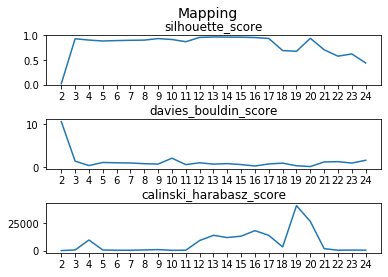

dataset: ComplexityReuse


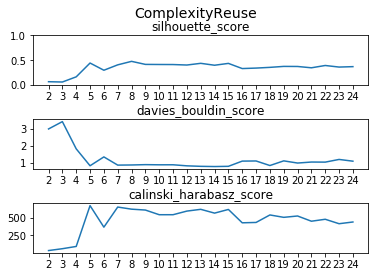

dataset: iFlow


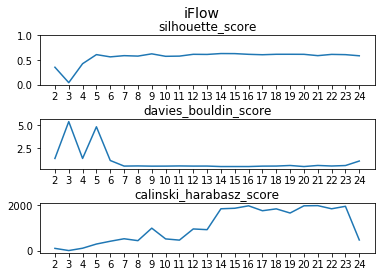

dataset: WSDL-xsd


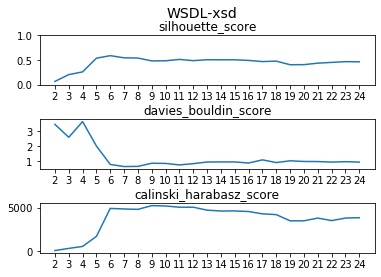

dataset: WSDL


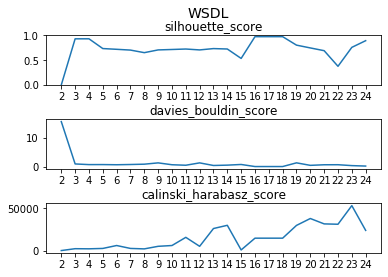

dataset: Property


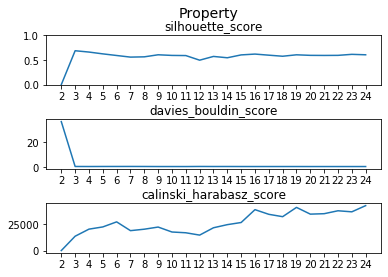

dataset: Groovy


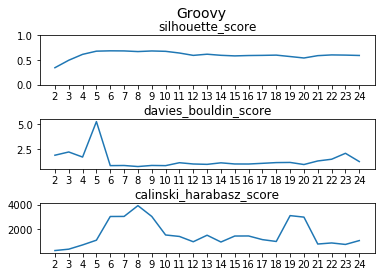

In [253]:
for name, score in datasetscores:
    print('dataset: {}'.format(name.replace("_", " ")))
    plot = plot_scores(score, size=clusterrange, name=name)
    plot.savefig("../images/"+name+'.png')

In [176]:
def closest(list, Number):
    temp = []
    for i in list:
        temp.append(abs(Number-i))

    return temp.index(min(temp))

# a = closest(mylist, mynumber)
# print "index is : ",a
# print "Closet value is : ",mylist[a]

def bestscores(scores):
    for name, score in scores:
        print("Name: {}".format(name))
        my_silhouette_score = score['silhouette_score']
        s = sorted(set(my_silhouette_score))
        a = closest(my_silhouette_score, 1)
        print("silhouette_score\n\tBest: {} clusters: {}\n\t2nd best: {} clusters:{}".format(\
                                    my_silhouette_score[a],a+2,s[1],\
                                    (int(my_silhouette_score.index(s[1])))+2))
        
        my_davies_bouldin_score = score['davies_bouldin_score']
        s = sorted(set(my_davies_bouldin_score), reverse=True)
        a = closest(my_davies_bouldin_score, 0)
        print("davies_bouldin_score\n\tBest: {} clusters: {}\n\t2nd best: {} clusters:{}".format(\
                                    my_davies_bouldin_score[a],a+2,s[1],\
                                    (int(my_davies_bouldin_score.index(s[1]))+2)))
        
        my_calinski_harabasz_score = score['calinski_harabasz_score']
        s = sorted(set(my_calinski_harabasz_score), reverse=True)
        print("calinski_harabasz_score\n\tBest: {} clusters: {}\n\t2nd best: {} clusters:{}\n"\
              .format(s[0],(int(my_calinski_harabasz_score.index(s[0]))+2),\
                      s[1],(int(my_calinski_harabasz_score.index(s[1]))+2)))
# del my_silhouette_score, my_davies_bouldin_score, my_calinski_harabasz_score

bestscores(datasetscores)

Name: Mapping
silhouette_score
	Best: 0.966851612282443 clusters: 13
	2nd best: 0.4416657887783218 clusters:24
davies_bouldin_score
	Best: 0.1871014538443016 clusters: 20
	2nd best: 2.111511494485017 clusters:10
calinski_harabasz_score
	Best: 40590.082929032535 clusters: 19
	2nd best: 26291.52553311698 clusters:20

Name: ComplexityReuse
silhouette_score
	Best: 0.4740331908953525 clusters: 8
	2nd best: 0.06206791262680878 clusters:2
davies_bouldin_score
	Best: 0.7826138524614153 clusters: 14
	2nd best: 2.9802276493434268 clusters:2
calinski_harabasz_score
	Best: 666.4725116034075 clusters: 5
	2nd best: 646.5287361681728 clusters:7

Name: iFlow
silhouette_score
	Best: 0.6319085024776397 clusters: 14
	2nd best: 0.3551285372645911 clusters:2
davies_bouldin_score
	Best: 0.5652841282216213 clusters: 14
	2nd best: 4.818102214759913 clusters:5
calinski_harabasz_score
	Best: 1988.2205858897319 clusters: 21
	2nd best: 1980.1550236361936 clusters:16

Name: WSDL-xsd
silhouette_score
	Best: 0.58933

In [193]:
clustersperdf = {#"XSD":19,
            "Mapping":13,
            "ComplexityReuse":8,
            "iFlow":14, #24 #15
            "WSDL-xsd":6,
            "WSDL":16,
            "Property":3, 
            "Groovy":8
           }

In [194]:
for name, df in datasets.items():
    localdf = df.drop(columns=['scenario','fileid'])
    res = ensemble_clustering(localdf, clustersperdf.get(name), N_ENSEMBLES)
    df['clusters'] = res

/Users/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: ConvergenceWarning:

Number of distinct clusters (14) found smaller than n_clusters (16). Possibly due to duplicate points in X.



In [195]:
for name, df in datasets.items():
    print(name, set(df['clusters']))

Mapping {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
ComplexityReuse {0, 1, 2, 3, 4, 5, 6, 7}
iFlow {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
WSDL-xsd {0, 1, 2, 3, 4, 5}
WSDL {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14}
Property {0, 1, 2}
Groovy {0, 1, 2, 3, 4, 5, 6, 7}


In [196]:
for name, df in datasets.items():
    df.to_csv(prefix + "QAS_new_v2_clusters_{}_clusters.csv".format(name))

## Clusters of clusters
### Define columns

In [197]:
columns=['scenario']
for name, df in datasets.items():
    clustlist = list(set(df['clusters']))
    for c in clustlist:
        columns+=[str(name+str(c))]
print(columns)

['scenario', 'Mapping0', 'Mapping1', 'Mapping2', 'Mapping3', 'Mapping4', 'Mapping5', 'Mapping6', 'Mapping7', 'Mapping8', 'Mapping9', 'Mapping10', 'Mapping11', 'Mapping12', 'ComplexityReuse0', 'ComplexityReuse1', 'ComplexityReuse2', 'ComplexityReuse3', 'ComplexityReuse4', 'ComplexityReuse5', 'ComplexityReuse6', 'ComplexityReuse7', 'iFlow0', 'iFlow1', 'iFlow2', 'iFlow3', 'iFlow4', 'iFlow5', 'iFlow6', 'iFlow7', 'iFlow8', 'iFlow9', 'iFlow10', 'iFlow11', 'iFlow12', 'iFlow13', 'WSDL-xsd0', 'WSDL-xsd1', 'WSDL-xsd2', 'WSDL-xsd3', 'WSDL-xsd4', 'WSDL-xsd5', 'WSDL0', 'WSDL1', 'WSDL2', 'WSDL3', 'WSDL4', 'WSDL5', 'WSDL6', 'WSDL7', 'WSDL8', 'WSDL9', 'WSDL10', 'WSDL12', 'WSDL13', 'WSDL14', 'Property0', 'Property1', 'Property2', 'Groovy0', 'Groovy1', 'Groovy2', 'Groovy3', 'Groovy4', 'Groovy5', 'Groovy6', 'Groovy7']


### Dataframe Construction (Binary and ratio)

In [273]:
# binaryoccurancedf = pd.DataFrame(columns)
datalist = []
dataratiolist = []
for i in range(0,scenariodf['scenarioid'].max()):
    d = {}
    d.update({'scenario':i})
    
    ratio = {}
    ratio.update({'scenario':i})
    filecount = 0
    for name, df in datasets.items():
        clustlist = list(set(df['clusters']))
        localdf = df[df['scenario']==i]
        amountoffiles = localdf.shape[0]
        filecount += amountoffiles
        
        for index,row in localdf.iterrows():
            key = name + str(int(row['clusters']))
            countval = ratio.get(key, None)
            if countval == None:
                ratio.update({key:1})
            else:
                ratio.update({key:countval+1})
            d.update({key:1})
    d.update({"filecount":filecount})
    ratio.update({"filecount":filecount})
    dataratiolist.append(ratio)
    datalist.append(d)
binaryoccurancedf = pd.DataFrame(datalist)
ratiooccurancedf = pd.DataFrame(dataratiolist)

In [278]:
ratiooccurancedf.head()

,scenario,Mapping10,iFlow1,WSDL-xsd1,WSDL0,Property0,Groovy0,Groovy2,Groovy6,Groovy1,...,ComplexityReuse5,Mapping4,ComplexityReuse2,WSDL6,Mapping3,iFlow10,WSDL8,WSDL7,WSDL9,Mapping6
0,0,1.0,1.0,4.0,1.0,5.0,1.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,1.0,NaN,1.0,2.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,11.0,NaN,2.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
binaryoccurancedf = binaryoccurancedf.fillna(0)

In [279]:
ratiooccurancedf = ratiooccurancedf.fillna(0)

#### Ratio function

In [280]:
def alterfunc(row):
    for i in columns[1:]:
        row[i] = row[i]/row['filecount']
    return row

ratiooccurancedf = ratiooccurancedf.apply(lambda row: alterfunc(row), axis=1)
ratiooccurancedf.head()

,scenario,Mapping10,iFlow1,WSDL-xsd1,WSDL0,Property0,Groovy0,Groovy2,Groovy6,Groovy1,...,ComplexityReuse5,Mapping4,ComplexityReuse2,WSDL6,Mapping3,iFlow10,WSDL8,WSDL7,WSDL9,Mapping6
0,0.0,0.052632,0.052632,0.210526,0.052632,0.263158,0.052632,0.105263,0.052632,0.105263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.000000,0.125000,0.000000,0.125000,0.250000,0.000000,0.125000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.000000,0.000000,0.000000,0.000000,0.550000,0.000000,0.100000,0.000000,0.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.400000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [287]:
copybinaryoccurancedf = binaryoccurancedf.copy()
copyratiooccurancedf = ratiooccurancedf.copy()

copybinaryoccurancedf = copybinaryoccurancedf.drop(columns=copybinaryoccurancedf.columns[10:])
copyratiooccurancedf = copyratiooccurancedf.drop(columns=copyratiooccurancedf.columns[10:])
copybinaryoccurancedf = copybinaryoccurancedf.drop(columns="scenario")
copyratiooccurancedf = copyratiooccurancedf.drop(columns="scenario")

In [288]:
copybinaryoccurancedf.rename_axis('scenario', axis=1, inplace=True)
copybinaryoccurancedf.head()

scenario,Mapping10,iFlow1,WSDL-xsd1,WSDL0,Property0,Groovy0,Groovy2,Groovy6,Groovy1
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [290]:
copyratiooccurancedf.rename_axis('scenario', axis=1, inplace=True)
copyratiooccurancedf.head()

scenario,Mapping10,iFlow1,WSDL-xsd1,WSDL0,Property0,Groovy0,Groovy2,Groovy6,Groovy1
0,0.052632,0.052632,0.210526,0.052632,0.263158,0.052632,0.105263,0.052632,0.105263
1,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000
2,0.000000,0.125000,0.000000,0.125000,0.250000,0.000000,0.125000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.550000,0.000000,0.100000,0.000000,0.050000
4,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.400000,0.000000,0.000000


In [292]:
from tabulate import tabulate
print(tabulate(copyratiooccurancedf.head(10), headers="keys", tablefmt="latex"))

\begin{tabular}{rrrrrrrrrr}
\hline
    &   Mapping10 &    iFlow1 &   WSDL-xsd1 &     WSDL0 &   Property0 &   Groovy0 &   Groovy2 &   Groovy6 &   Groovy1 \\
\hline
  0 &   0.0526316 & 0.0526316 &    0.210526 & 0.0526316 &    0.263158 & 0.0526316 &  0.105263 & 0.0526316 & 0.105263  \\
  1 &   0         & 0         &    0        & 0         &    0.125    & 0         &  0.125    & 0         & 0         \\
  2 &   0         & 0.125     &    0        & 0.125     &    0.25     & 0         &  0.125    & 0         & 0         \\
  3 &   0         & 0         &    0        & 0         &    0.55     & 0         &  0.1      & 0         & 0.05      \\
  4 &   0         & 0         &    0        & 0         &    0.2      & 0         &  0.4      & 0         & 0         \\
  5 &   0         & 0.04      &    0.16     & 0         &    0.44     & 0         &  0.12     & 0         & 0         \\
  6 &   0         & 0         &    0        & 0         &    0.833333 & 0         &  0        & 0         & 0  

### Binary run

In [210]:
localbinaryoccurancedf = binaryoccurancedf.copy()
localbinaryoccurancedf = localbinaryoccurancedf.drop(columns=["scenario","filecount"])
clusterrange = 25
binaryoccurancescores = []
name = "Binary Test"
binres = range_of_clusters(localbinaryoccurancedf, 2, clusterrange, 40)
binaryoccurancescores.append((name, binres))

number of clusters: 2
   silhouette_score score: 0.03306447457520846
   davies_bouldin_score score: 5.878266691548094
   calinski_harabasz_score score: 12.633666726263783
number of clusters: 3
   silhouette_score score: 0.046107761746338294
   davies_bouldin_score score: 4.259141723674193
   calinski_harabasz_score score: 19.78838832579512
number of clusters: 4
   silhouette_score score: 0.045134889746432635
   davies_bouldin_score score: 3.2107052678164267
   calinski_harabasz_score score: 25.331060143769488
number of clusters: 5
   silhouette_score score: 0.04601610642267726
   davies_bouldin_score score: 3.105888284439736
   calinski_harabasz_score score: 22.670972806916
number of clusters: 6
   silhouette_score score: 0.08478519729574167
   davies_bouldin_score score: 2.644212486912859
   calinski_harabasz_score score: 30.117460132918954
number of clusters: 7
   silhouette_score score: 0.07698544962331681
   davies_bouldin_score score: 2.8661273349452503
   calinski_harabasz_score 

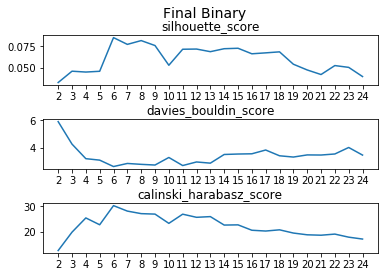

Name: Binary Test
silhouette_score
	Best: 0.08478519729574167 clusters: 6
	2nd best: 0.03996008093185721 clusters:24
davies_bouldin_score
	Best: 2.644212486912859 clusters: 6
	2nd best: 4.259141723674193 clusters:3
calinski_harabasz_score
	Best: 30.117460132918954 clusters: 6
	2nd best: 27.991963986820096 clusters:7



In [260]:
plot = plot_scores(binres, size=clusterrange, name="Final Binary")
plot.savefig("../images/"+"Final Binary"+'.png')
bestscores(binaryoccurancescores)

### Ratio run

In [211]:
localratiooccurancedf = ratiooccurancedf.copy()
localratiooccurancedf = localratiooccurancedf.drop(columns=["scenario","filecount"])
clusterrange = 25
ratiooccurancescores = []
name = "Ratio Test"
ratres = range_of_clusters(localratiooccurancedf, 2, clusterrange, 40)
ratiooccurancescores.append((name, ratres))

number of clusters: 2
   silhouette_score score: 0.0548757536012716
   davies_bouldin_score score: 4.061957201768166
   calinski_harabasz_score score: 22.898274966077498
number of clusters: 3
   silhouette_score score: 0.06624053091140156
   davies_bouldin_score score: 3.1562239992841388
   calinski_harabasz_score score: 29.8263747678077
number of clusters: 4
   silhouette_score score: 0.09931797967188424
   davies_bouldin_score score: 2.338086911495581
   calinski_harabasz_score score: 45.91742292210841
number of clusters: 5
   silhouette_score score: 0.07598402863526744
   davies_bouldin_score score: 2.244963726782248
   calinski_harabasz_score score: 48.741427706561076
number of clusters: 6
   silhouette_score score: 0.10659847792876119
   davies_bouldin_score score: 2.3762067575390273
   calinski_harabasz_score score: 54.17212920850683
number of clusters: 7
   silhouette_score score: 0.11835418297711132
   davies_bouldin_score score: 2.075124832369037
   calinski_harabasz_score sco

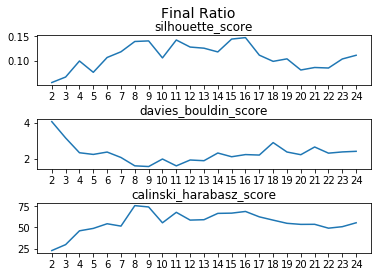

Name: Ratio Test
silhouette_score
	Best: 0.14762306021210622 clusters: 16
	2nd best: 0.06624053091140156 clusters:3
davies_bouldin_score
	Best: 1.5734050833991262 clusters: 9
	2nd best: 3.1562239992841388 clusters:3
calinski_harabasz_score
	Best: 75.31996944882042 clusters: 8
	2nd best: 73.75463020956694 clusters:9



In [261]:
plot = plot_scores(ratres, size=clusterrange, name="Final Ratio")
plot.savefig("../images/"+"Final Ratio"+'.png')
bestscores(ratiooccurancescores)

### KMeans

#### Binary

In [215]:
random_state = 42

In [216]:
localbinaryoccurancedf = binaryoccurancedf.drop(columns=['scenario','filecount'])
km = KMeans(n_clusters=6, random_state=random_state)
binkmeanres = km.fit_predict(localbinaryoccurancedf.values)
dfcopy = binaryoccurancedf.copy()
dfcopy['cluster'] = binkmeanres
dfcopy['scenario'] = dfcopy['scenario'].apply(scenarioid_to_scenario)

#### Ratio

In [217]:
localratiooccurancedf = ratiooccurancedf.drop(columns=['scenario','filecount'])
ratiokm = KMeans(n_clusters=9, random_state=random_state)
ratiokmeanres = ratiokm.fit_predict(localratiooccurancedf.values)
ratiodfcopy = ratiooccurancedf.copy()
ratiodfcopy['cluster'] = ratiokmeanres
ratiodfcopy['scenario'] = ratiodfcopy['scenario'].apply(scenarioid_to_scenario)

In [218]:
binaryoccurancedf = binaryoccurancedf['scenario'].apply(scenarioid_to_scenario)

In [219]:
ratiodfcopy.to_csv("../generateddata/ratiooccuranceclusters.csv")

In [220]:
dfcopy.to_csv("../generateddata/binaryoccuranceclusters.csv")

## Visualize Binary

In [47]:
dfcopy = pd.read_csv("../generateddata/binaryoccuranceclusters.csv")

In [50]:
dfcopy.drop(columns=['Unnamed: 0'], inplace=True)

In [56]:
dfcopy['scenario'] = dfcopy['scenario'].apply(scenario_to_scenarioid)

In [93]:
pca = PCA(3) 
pca.fit(dfcopy) 
  
pca_data = pd.DataFrame(pca.transform(dfcopy)) 
  
pca_data.head()

,0,1,2
0,227.000416,-0.316930,0.350718
1,225.996005,-11.358704,-0.417394
2,224.995127,-11.345553,-0.629152
3,224.001045,0.657881,-0.273364
4,222.994825,-14.358094,0.644426


In [94]:
clusters = 6
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 

In [95]:
pca_data.head()

,0,1,2
0,227.000416,-0.316930,0.350718
1,225.996005,-11.358704,-0.417394
2,224.995127,-11.345553,-0.629152
3,224.001045,0.657881,-0.273364
4,222.994825,-14.358094,0.644426


In [96]:
dfcopy['scenario'] = dfcopy['scenario'].apply(scenarioid_to_scenario)

In [97]:
fig2 = px.scatter(x=pca_data[1], y=pca_data[2], hover_name=dfcopy['scenario'], size=dfcopy['filecount'],\
                    color=km.labels_, template='plotly', title="plot")
fig2.show(renderer="chrome")

NameError: name 'km' is not defined

In [936]:
file = open("../generateddata/Binary Clusters.html","w") 
 
file.write(plotlyio.to_html(fig2))
 
file.close() 

## Visualize Ratio

In [229]:
ratiodfcopy['scenario'] = ratiodfcopy['scenario'].apply(scenario_to_scenarioid)

In [230]:
pca2 = PCA(3) 
pca2.fit(ratiodfcopy) 
  
pca_data2 = pd.DataFrame(pca2.transform(ratiodfcopy)) 
  
pca_data2.head()

,0,1,2
0,226.998193,-0.322680,2.240230
1,225.993684,-11.321689,2.341442
2,224.996061,-11.348181,-0.658086
3,224.003403,0.624497,-3.772215
4,222.996444,-14.364878,-2.635472


In [231]:
clusters = 9
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 

In [232]:
pca_data2.head()

,0,1,2
0,226.998193,-0.322680,2.240230
1,225.993684,-11.321689,2.341442
2,224.996061,-11.348181,-0.658086
3,224.003403,0.624497,-3.772215
4,222.996444,-14.364878,-2.635472


In [233]:
ratiodfcopy['scenario'] = ratiodfcopy['scenario'].apply(scenarioid_to_scenario)

In [258]:
fig2 = px.scatter(x=pca_data2[1], y=pca_data2[2], hover_name=ratiodfcopy['scenario'], size=ratiodfcopy['filecount'],\
                    color=ratiokm.labels_, template='plotly', title="plot")

# fig2.update_yaxes(showgrid=True, zeroline=False)
# fig2.update_yaxes(ticks="outside", col=1)

fig2.show(renderer="chrome")

In [934]:
file = open("../generateddata/Ratio Clusters.html","w") 
 
file.write(plotlyio.to_html(fig2))
 
file.close() 

In [237]:
fig = px.scatter_3d(x=pca_data2[0], y=pca_data2[1], z=pca_data2[2], hover_name=ratiodfcopy['scenario'], \
                    size=ratiodfcopy['filecount'],\
                    color=ratiokm.labels_,  title="3dplot")

fig.update_yaxes(showgrid=True, zeroline=False)
fig.update_yaxes(ticks="outside", col=1)

# fig.update_xaxes(title_text='Race')
# fig.update_yaxes(title_text='Rank')
fig.show(renderer="chrome")

# Next step

## Select 20% of each cluster

In [4]:
ratiodfcopy = pd.read_csv("../generateddata/ratiooccuranceclusters.csv")
# ratiodfcopy.head()

In [9]:
counts = {}
for i in range(0,6):
    isum = 0
    for j in list(ratiodfcopy['cluster'].values):
        if j==i:
            isum += 1
    counts.update({i:isum})
print(counts)

{0: 111, 1: 94, 2: 150, 3: 14, 4: 86, 5: 0}


In [5]:
dfcopy = pd.read_csv("../generateddata/binaryoccuranceclusters.csv")
# dfcopy.head()

In [10]:
counts = {}
for i in range(0,6):
    isum = 0
    for j in list(dfcopy['cluster'].values):
        if j==i:
            isum += 1
    counts.update({i:isum})
print(counts)

{0: 117, 1: 98, 2: 65, 3: 149, 4: 26, 5: 0}


### Binary

In [7]:
dflist=[]
for i in range(0,5):
    dflist.append(dfcopy[dfcopy['cluster']==i].sample(frac=0.2, replace=False, random_state=5))

In [8]:
subset = pd.concat(dflist)
# subset.head()

In [841]:
counts = {}
for i in range(0,5):
    isum = 0
    for j in list(subset['cluster'].values):
        if j==i:
            isum += 1
    counts.update({i:isum})
print(counts)

{0: 23, 1: 20, 2: 13, 3: 30, 4: 5}


### Ratio

In [9]:
dflist=[]
for i in range(0,6):
    dflist.append(ratiodfcopy[ratiodfcopy['cluster']==i].sample(frac=0.2, replace=False, random_state=5))

In [10]:
subset = pd.concat(dflist)
# subset.head()

In [916]:
counts = {}
for i in range(0,6):
    isum = 0
    for j in list(subset['cluster'].values):
        if j==i:
            isum += 1
    counts.update({i:isum})
print(counts)

{0: 22, 1: 3, 2: 17, 3: 19, 4: 28, 5: 2}


## Include error/success data from the past X days/hours/weeks

In [1083]:
url_user_pass = {}
with open('url_user_pass.json') as json_file:
    url_user_pass = json.load(json_file)
    url_user_pass = url_user_pass.get("ExtractData")

In [1084]:
host = url_user_pass.get("PostNL").get("qashost")
# url = url_user_pass.get("QforIT").get("host")
# url = url_user_pass.get("other").get("url2")

baseurl='https://'+host+url_user_pass.get("PostNL").get("baseurl")

session = requests.Session()
session.auth = (url_user_pass.get("suser"), url_user_pass.get("password"))

In [1085]:
session.mount('https://', HTTPAdapter(pool_connections=5, pool_maxsize=20))
def getCount():
    counturl = url+"MessageProcessingLogs/$count"

    r = session.get(str(counturl))
    count = r.content
    bcount = int(str(count)[2:8])
    return bcount

def requesturl(top,skip,url):
    requesturl = url.format(top,skip)
    return requesturl

def request(top,skip,url):
    req = requesturl(top,skip, str(url))
    res = session.get(req)
    contents = res.content.decode('utf8')
    data = json.loads(contents)
    
    return data

In [973]:
def getscenariocount(scenario = None):
    url = baseurl + "MessageProcessingLogs/?$filter=IntegrationFlowName eq '{}'&$inlinecount=allpages&$format=json&$select=Status".format(scenario)
    data = request(0,0,url)
#     print(data)
    count = data.get('d').get('__count')
    return count, data.get('d').get('results')

In [975]:
dataset = []
c={}
pbar = tqdm(total=len(ratiodfcopy['scenario'].unique()), leave=False)
for scenario in ratiodfcopy['scenario'].unique():
    count, data = getscenariocount(scenario)
    dataset.append(data)
    c.update({scenario:count})
    pbar.update(1)
pbar.close()

In [1031]:
testdfset = []

for i in range(0, len(dataset)):
    scenariovalue = list(c.keys())[i]
#     print(scenariovalue)
    for j in dataset[i]:
        status = j.get('Status')
        testdfset.append((scenariovalue,status))


In [11]:
attemptdfsomething = pd.DataFrame(testdfset, columns=["scenario","messages"])
# attemptdfsomething.head()

NameError: name 'testdfset' is not defined

In [1034]:
attemptdfsomething.messages.unique()

array(['RETRY', 'COMPLETED', 'FAILED', 'PROCESSING'], dtype=object)

In [977]:
q=0
filt = []
for j in c.items():
    if int(j[1]) == 0:
        q+=1
        filt.append(j[0])
print(q)

154


In [980]:
binarydffiltered = dfcopy.copy()
binarydffiltered = binarydffiltered[~binarydffiltered.scenario.isin(filt)]

In [1048]:
binarydffiltered.describe()

,iFlow18,WSDL-xsd2,WSDL1,Property1,Groovy0,Groovy1,Groovy3,Groovy2,filecount,XSD10,...,WSDL9,iFlow13,XSD6,Property6,WSDL12,Property5,XSD4,XSD7,XSD17,cluster
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,...,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,0.086379,0.259136,0.249169,0.538206,0.275748,0.740864,0.139535,0.332226,15.621262,0.029900,...,0.003322,0.009967,0.003322,0.066445,0.016611,0.066445,0.013289,0.013289,0.003322,1.764120
std,0.281390,0.438890,0.433252,0.499368,0.447634,0.438890,0.347081,0.471796,13.130730,0.170596,...,0.057639,0.099500,0.057639,0.249473,0.128023,0.249473,0.114700,0.114700,0.057639,1.388347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,13.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,17.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,123.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [12]:
completeddfsomething = attemptdfsomething.copy()
completeddfsomething = completeddfsomething[completeddfsomething['messages']=='COMPLETED']
# completeddfsomething.head()

NameError: name 'attemptdfsomething' is not defined

In [1059]:
notcompleteddfsomething = attemptdfsomething.copy()
notcompleteddfsomething = notcompleteddfsomething[notcompleteddfsomething['messages']!="COMPLETED"]

In [13]:
# notcompleteddfsomething.describe()

In [1062]:
error_containing_scenarios = notcompleteddfsomething['scenario'].unique()

In [1064]:
binarydffiltered2 = dfcopy.copy()
binarydffiltered2 = binarydffiltered2[binarydffiltered2.scenario.isin(error_containing_scenarios)]
binarydffiltered2.describe()

,iFlow18,WSDL-xsd2,WSDL1,Property1,Groovy0,Groovy1,Groovy3,Groovy2,filecount,XSD10,...,WSDL9,iFlow13,XSD6,Property6,WSDL12,Property5,XSD4,XSD7,XSD17,cluster
count,76.000000,76.000000,76.000000,76.000000,76.00000,76.000000,76.000000,76.000000,76.000000,76.0,...,76.0,76.000000,76.0,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,0.171053,0.328947,0.263158,0.657895,0.25000,0.907895,0.078947,0.368421,20.421053,0.0,...,0.0,0.013158,0.0,0.052632,0.026316,0.105263,0.026316,0.013158,0.013158,1.078947
std,0.379057,0.472953,0.443273,0.477567,0.43589,0.291096,0.271448,0.485582,16.578913,0.0,...,0.0,0.114708,0.0,0.224781,0.161136,0.308931,0.161136,0.114708,0.114708,1.186178
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,13.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,15.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,0.25000,1.000000,0.000000,1.000000,25.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,123.000000,0.0,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


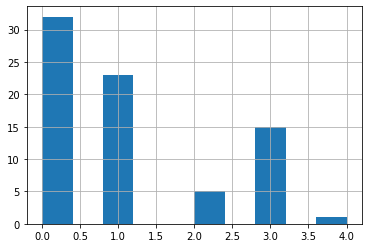

In [1065]:
binarydffiltered2['cluster'].hist()

In [1070]:
r = list(binarydffiltered2['cluster'].values)
counts = {}
for i in range(0,max(r)+1):
    isum = 0
    for j in r:
        if j==i:
            isum += 1
    counts.update({i:isum})
print(counts)

{0: 32, 1: 23, 2: 5, 3: 15, 4: 1}


In [1074]:
binarydffiltered2.to_csv("../generateddata/binarydffiltered2.csv")

In [1075]:
ratiodffiltered2 = ratiodfcopy.copy()
ratiodffiltered2 = ratiodffiltered2[ratiodffiltered2.scenario.isin(error_containing_scenarios)]
# ratiodffiltered2.describe()
ratiodffiltered2.to_csv("../generateddata/ratiodffiltered2.csv")

## Parzen

In [223]:
dfcopy = pd.read_csv("../generateddata/binaryoccuranceclusters.csv")

dfcopy['scenario'] = dfcopy['scenario'].apply(scenario_to_scenarioid)

In [224]:
dfcopy.drop(columns=["Unnamed: 0", "cluster"], inplace=True)

In [230]:
pca = PCA(3) 
pca.fit(dfcopy) 
  
pca_data = pd.DataFrame(pca.transform(dfcopy)) 

pca_data.head()

,0,1,2
0,227.000416,-0.316930,0.350718
1,225.996005,-11.358704,-0.417394
2,224.995127,-11.345553,-0.629152
3,224.001045,0.657881,-0.273364
4,222.994825,-14.358094,0.644426


In [231]:
X_all = pca_data.to_numpy()

In [263]:
def parzen_window_est(x_samples, h=1, center=[0,0,0]):
    '''
    source: https://sebastianraschka.com/Articles/2014_kernel_density_est.html
    Implementation of the Parzen-window estimation for hypercubes.

    Keyword arguments:
        x_samples: A 'n x d'-dimensional numpy array, where each sample
            is stored in a separate row.
        h: The length of the hypercube.
        center: The coordinate center of the hypercube

    Returns the probability density for observing k samples inside the hypercube.

    '''
    dimensions = x_samples.shape[1]

    assert (len(center) == dimensions), 'Number of center coordinates have to match sample dimensions'
    k = 2
    for x in x_samples:
        is_inside = 1
        for axis,center_point in zip(x, center):
            if np.abs(axis-center_point) > (h/2):
                is_inside = 0
        k += is_inside
    return (k / len(x_samples)) / (h**dimensions)

print('p(x) =', parzen_window_est(X_all, h=1))

p(x) = 0.004395604395604396


In [78]:
def hypercube_kernel(h, x, x_i):
    """
    Implementation of a hypercube kernel for Parzen-window estimation.

    Keyword arguments:
        h: window width
        x: point x for density estimation, 'd x 1'-dimensional numpy array
        x_i: point from training sample, 'd x 1'-dimensional numpy array

    Returns a 'd x 1'-dimensional numpy array as input for a window function.

    """
    assert (x.shape == x_i.shape), 'vectors x and x_i must have the same dimensions'
    return (x - x_i) / (h)


def parzen_window_func(x_vec, h=1):
    """
    Implementation of the window function. Returns 1 if 'd x 1'-sample vector
    lies within inside the window, 0 otherwise.

    """
    for row in x_vec:
        if np.abs(row) > (1/2):
            return 0
    return 1


def parzen_estimation(x_samples, point_x, h, d, window_func, kernel_func):
    """
    Implementation of a parzen-window estimation.

    Keyword arguments:
        x_samples: A 'n x d'-dimensional numpy array, where each sample
            is stored in a separate row. (= training sample)
        point_x: point x for density estimation, 'd x 1'-dimensional numpy array
        h: window width
        d: dimensions
        window_func: a Parzen window function (phi)
        kernel_function: A hypercube or Gaussian kernel functions

    Returns the density estimate p(x).

    """
    k_n = 0
    for row in x_samples:
        x_i = kernel_func(h=h, x=point_x, x_i=row[:,np.newaxis])
        k_n += window_func(x_i, h=h)
    return (k_n / len(x_samples)) / (h**d)

point_x = np.array([[0],[0],[0]])

print('p(x) =', parzen_estimation(X_all, point_x, h=1, d=3,
                                 window_func=parzen_window_func,
                                 kernel_func=hypercube_kernel
                                 )
     )

p(x) = 0.0


In [79]:
dfcopy.columns

Index(['scenario', 'Mapping10', 'iFlow1', 'WSDL-xsd1', 'WSDL0', 'Property0',
       'Groovy0', 'Groovy2', 'Groovy6', 'Groovy1', 'Groovy7', 'filecount',
       'Mapping1', 'ComplexityReuse4', 'iFlow2', 'WSDL-xsd4', 'WSDL-xsd3',
       'WSDL-xsd2', 'Groovy4', 'iFlow0', 'WSDL1', 'WSDL2', 'Groovy3',
       'ComplexityReuse0', 'WSDL-xsd0', 'ComplexityReuse1', 'iFlow7', 'WSDL10',
       'WSDL13', 'Mapping11', 'iFlow12', 'iFlow9', 'WSDL-xsd5', 'WSDL4',
       'Mapping12', 'iFlow13', 'iFlow6', 'Mapping5', 'iFlow11', 'Groovy5',
       'Mapping8', 'ComplexityReuse3', 'iFlow8', 'WSDL14', 'iFlow5', 'iFlow4',
       'Mapping0', 'ComplexityReuse7', 'ComplexityReuse6', 'WSDL12', 'WSDL3',
       'iFlow3', 'Mapping9', 'Property1', 'Property2', 'Mapping2', 'WSDL5',
       'Mapping7', 'ComplexityReuse5', 'Mapping4', 'ComplexityReuse2', 'WSDL6',
       'Mapping3', 'iFlow10', 'WSDL8', 'WSDL7', 'WSDL9', 'Mapping6'],
      dtype='object')

In [80]:
dfcopy.describe()

,scenario,Mapping10,iFlow1,WSDL-xsd1,WSDL0,Property0,Groovy0,Groovy2,Groovy6,Groovy1,...,ComplexityReuse5,Mapping4,ComplexityReuse2,WSDL6,Mapping3,iFlow10,WSDL8,WSDL7,WSDL9,Mapping6
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,227.000000,0.050549,0.391209,0.386813,0.413187,0.769231,0.254945,0.747253,0.109890,0.276923,...,0.061538,0.008791,0.070330,0.002198,0.004396,0.010989,0.002198,0.002198,0.002198,0.002198
std,131.491445,0.219317,0.488558,0.487556,0.492948,0.421789,0.436310,0.435066,0.313097,0.447971,...,0.240580,0.093451,0.255983,0.046881,0.066226,0.104366,0.046881,0.046881,0.046881,0.046881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,227.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,340.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,454.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
pca = PCA(2) 
pca.fit(dfcopy) 

x_2Dgauss = pd.DataFrame(pca.transform(dfcopy)) 
x_2Dgauss.head()

,0,1
0,227.000416,-0.316930
1,225.996005,-11.358704
2,224.995127,-11.345553
3,224.001045,0.657881
4,222.994825,-14.358094


In [82]:
dataf=((x_2Dgauss-x_2Dgauss.min())/(x_2Dgauss.max()-x_2Dgauss.min()))

In [83]:
dataf.head()

,0,1
0,1.000000,0.115602
1,0.997788,0.044852
2,0.995583,0.044936
3,0.993393,0.121848
4,0.991177,0.025633


In [257]:
dataf.shape

(455, 2)

In [250]:
datafnp = dataf.to_numpy()

In [84]:
def pdf_multivariate_gauss(x, mu, cov):
    '''
    Caculate the multivariate normal density (pdf)

    Keyword arguments:
        x = numpy array of a "d x 1" sample vector
        mu = numpy array of a "d x 1" mean vector
        cov = "numpy array of a d x d" covariance matrix
    '''
    assert(mu.shape[0] > mu.shape[1]),\
        'mu must be a row vector'
    assert(x.shape[0] > x.shape[1]),\
        'x must be a row vector'
    assert(cov.shape[0] == cov.shape[1]),\
        'covariance matrix must be square'
    assert(mu.shape[0] == cov.shape[0]),\
        'cov_mat and mu_vec must have the same dimensions'
    assert(mu.shape[0] == x.shape[0]),\
        'mu and x must have the same dimensions'

    part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
    part2 = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
    return float(part1 * np.exp(part2))

In [85]:
from scipy.stats import kde
import prettytable

mu = np.array([[0],[0]])
cov = np.eye(2)

scott = kde.gaussian_kde(dataf.T, bw_method='scott')
silverman = kde.gaussian_kde(dataf.T, bw_method='silverman')
scalar = kde.gaussian_kde(dataf.T, bw_method=0.3)
actual = pdf_multivariate_gauss(np.array([[0],[0]]), mu, cov)

results = prettytable.PrettyTable(["", "p([0,0]^t gaussian kernel"])
results.add_row(["bw_method scalar 0.3:", scalar.evaluate(np.array([[0],[0]]))[0]])
results.add_row(["bw_method scott:", scott.evaluate(np.array([[0],[0]]))[0]])
results.add_row(["bw_method silverman:", silverman.evaluate(np.array([[0],[0]]))[0]])
results.add_row(["actual density:", actual])

print(results)

+-----------------------+---------------------------+
|                       | p([0,0]^t gaussian kernel |
+-----------------------+---------------------------+
| bw_method scalar 0.3: |     1.1703358598942344    |
|    bw_method scott:   |     1.1573885257203154    |
|  bw_method silverman: |     1.1573885257203154    |
|    actual density:    |    0.15915494309189535    |
+-----------------------+---------------------------+


In [262]:
print('Predict p(x) at the center [0,0]: ')

print('h = 0.1 ---> p(x) =', parzen_window_est(
        datafnp, h=0.1, center=[0, 0])
        )
print('h = 0.3 ---> p(x) =',parzen_window_est(
        datafnp, h=0.3, center=[0, 0])
        )
print('h = 0.5 ---> p(x) =',parzen_window_est(
        datafnp, h=0.5, center=[0, 0])
        )
print('h = 0.6 ---> p(x) =',parzen_window_est(
        datafnp, h=0.6, center=[0, 0])
        )
print('h = 0.8 ---> p(x) =',parzen_window_est(
        datafnp, h=0.8, center=[0, 0])
        )
print('h = 1 ---> p(x) =',parzen_window_est(
        datafnp, h=1, center=[0, 0])
        )

Predict p(x) at the center [0,0]: 
h = 0.1 ---> p(x) = 2.1978021978021975
h = 0.3 ---> p(x) = 1.4652014652014653
h = 0.5 ---> p(x) = 0.9318681318681319
h = 0.6 ---> p(x) = 0.8119658119658121
h = 0.8 ---> p(x) = 0.6318681318681317
h = 1 ---> p(x) = 0.5076923076923077


In [253]:
import operator

# generate a range of 400 window widths between 0 < h < 1
h_range = np.linspace(0.001, 1, 400)

# calculate the actual density at the center [0, 0]
mu = np.array([[0],[0]])
cov = np.eye(2)
actual_pdf_val = pdf_multivariate_gauss(np.array([[0],[0]]), mu, cov)

# get a list of the differnces (|estimate-actual|) for different window widths
parzen_estimates = [np.abs(parzen_window_est(datafnp, h=i, center=[0, 0])
               - actual_pdf_val) for i in h_range]

# get the window width for which |estimate-actual| is closest to 0
min_index, min_value = min(enumerate(parzen_estimates), key=operator.itemgetter(1))

print('Optimal window width for this data set: ', h_range[min_index], "\nvalue: ", min_value)

Optimal window width for this data set:  1.0 
value:  0.3485373646004123


In [264]:
import prettytable

p1 = parzen_window_est(datafnp, h=h_range[min_index], center=[0, 0])
p2 = parzen_window_est(datafnp, h=h_range[min_index], center=[0.5, 0.5])
p3 = parzen_window_est(datafnp, h=h_range[min_index], center=[0.3, 0.2])

mu = np.array([[0],[0]])
cov = np.eye(2)

a1 = pdf_multivariate_gauss(np.array([[0],[0]]), mu, cov)
a2 = pdf_multivariate_gauss(np.array([[0.5],[0.5]]), mu, cov)
a3 = pdf_multivariate_gauss(np.array([[0.3],[0.2]]), mu, cov)

results = prettytable.PrettyTable(["", "predicted", "actual"])
results.add_row(["p([0,0]^t",p1, a1])
results.add_row(["p([0.5,0.5]^t",p2, a2])
results.add_row(["p([0.3,0.2]^t",p3, a3])

print(results)

+---------------+--------------------+---------------------+
|               |     predicted      |        actual       |
+---------------+--------------------+---------------------+
|   p([0,0]^t   | 0.5010989010989011 | 0.15915494309189535 |
| p([0.5,0.5]^t | 1.0043956043956044 | 0.12394999430965298 |
| p([0.3,0.2]^t | 0.8021978021978022 | 0.14913891880709737 |
+---------------+--------------------+---------------------+


In [86]:
X = dataf[0].values
Y = dataf[1].values

X,Y = np.meshgrid(X,Y)

In [87]:
def closest_factor_pair(x: int) -> tuple:
    """
    Tries to find the pair of factors of x, i.e. the
    closest integers to the square root of x.

    Example
    >>> closest_factor_pair(34191)
    (131, 261)
    """
    for i in range(int(np.sqrt(x)), 0, -1):
        if x % i == 0:
            return i, int(x/i)
    return None

In [88]:
# X = x_2Dgauss.values
# X,Y = np.meshgrid(X,Y)

# fig = plt.figure(figsize=(10, 7))
# ax = fig.gca(projection='3d')


Z = []
# for i,j in zip(X.ravel(),Y.ravel()):
#     Z.append(parzen_estimation(dataf, np.array([[i],[j]]), h=0.3, d=2,
#                                  window_func=parzen_window_func,
#                                  kernel_func=hypercube_kernel))

# Z = np.asarray(Z).reshape(100,100)
# surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
#         linewidth=0, antialiased=False)

# ax.set_zlim(0, 0.2)

# ax.zaxis.set_major_locator(plt.LinearLocator(10))
# ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('p(x)')

# plt.title('Hypercube kernel with window width h=0.3')

# fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

# plt.show()

In [89]:
import numpy as np
from matplotlib import pyplot as plt
# from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from time import time

datadict = {}

#########################################
### Gaussian kernel density estimates ###
#########################################

for bwmethod,t in zip([scalar, scott, silverman], ['scalar h=0.3', 'scott',
        'silverman']):
    t0 = time()
#     fig = plt.figure(figsize=(10, 7))
#     ax = fig.gca(projection='3d')
    Z = bwmethod(np.array([X.ravel(),Y.ravel()]))
    shape = closest_factor_pair(len(Z))
#     Z = Z.reshape(100,100)
    Z = np.reshape(Z,shape)
    datadict.update({t:{'X':X,'Y':Y,'Z':Z}})
    print("done in %0.3fs" % (time() - t0))
    
#     surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
#         linewidth=0, antialiased=False)
    
    
    
#     ax.set_zlim(0, 0.2)
#     ax.zaxis.set_major_locator(plt.LinearLocator(10))
#     ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')

#     ax.set_zlabel('p(x)')

#     plt.title('Gaussian kernel, bw_method %s' %t)
#     fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)
#     plt.show()


done in 1.018s
done in 0.820s
done in 0.791s


In [218]:
for p in datadict.keys():
    mod = datadict.get(p)
    fig = go.Figure(data=[go.Surface(z=mod.get('Z'), x=mod.get('X'), y=mod.get('Y'))])
    fig.update_layout(title=p, autosize=True,
                      width=500, height=500)
    fig.show(renderer='chrome')

In [219]:
# ###########################################
# ### Actual bivariate Gaussian densities ###
# ###########################################
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                     mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom


# fig = plt.figure(figsize=(10, 7))
# ax = fig.gca(projection='3d')
Z = bivariate_normal(X, Y)
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
fig.update_layout(title='Actual bivariate Gaussian densities', autosize=True,
                  width=500, height=500)
fig.show(renderer='chrome')
# surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
#         linewidth=0, antialiased=False)

# ax.set_zlim(0, 0.2)

# ax.zaxis.set_major_locator(plt.LinearLocator(10))
# ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))
# fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('p(x)')
# plt.title('Actual bivariate Gaussian densities')

# plt.show()

In [50]:
fig.update_layout(
    width = 800,
    height = 500,
    title = "fixed-ratio axes with compressed axes",
    xaxis = dict(
      range=[-2,2],  # sets the range of xaxis
#       constrain="domain",  # meanwhile compresses the xaxis by decreasing its "domain"
    ),
    yaxis = dict(
      scaleanchor = "x",
      scaleratio = 1,
    ),
)
fig.show(renderer='chrome')


## Actual Errors

In [108]:
ticketoverview_closed = pd.read_excel(prefix+"TicketOverview.xlsm", sheet_name="Closed")
ticketoverview_open = pd.read_excel(prefix+"TicketOverview.xlsm", sheet_name="Open")
ticketoverview_open.drop(columns=["Kolom1"], inplace=True)

In [14]:
# ticketoverview_closed.head()

In [15]:
# ticketoverview_open.head()

In [16]:
# ticketoverview_open['Interface'].unique()

In [428]:
uniopen = ticketoverview_open['Interface']
uniclosed = ticketoverview_closed['Interface']
alliflows = np.concatenate( (uniopen,uniclosed) )
alliflows = np.array(alliflows)

countdict = Counter(alliflows)
# print(countdict)
# len(ticketoverview_open['Interface'].unique())
# len(ticketoverview_closed['Interface'].unique())
counter = 0
y1,y2,weights = [],[],[]
for i in countdict.keys():
    weight = countdict.get(i)
    localiflow = dictrating.get(i,"Missing")
    if localiflow != "Missing":
        counter+=1
        print(localiflow)
        if len(localiflow) == 2:
            y1.append(localiflow[0])
            y2.append(localiflow[1])
            weights.append(weight)
        else:
            continue
    else:
        continue
   
    if counter == 20:
        break;
cohen_kappa_score(y1,y2, weights="quadratic", sample_weight=weights)

[4, 4]
[4, 4]
[4, 4]
[2, 3]
[1, 1]
[5, 4]
[1, 3]
[4, 5]
[4, 4]
[3, 3]
[2, 2]
[1, 1]
[3, 2]
[5, 5]
[4, 4]
[1, 3]
[2, 3]
[1, 1]
[3, 4]
[5, 5]


0.8651693461523118

## Cohen Kappa

In [322]:
ratingSven = pd.read_excel(prefix+"iFlow rating Sven.xlsx", header=7)
ratingKenny = pd.read_excel(prefix+"iFlow rating Kenny.xlsx", header=7)
ratingTom = pd.read_excel(prefix+"iFlow rating Tom.xlsx", header=7)
ratingBrian = pd.read_excel(prefix+"iFlow rating Brian.xlsx", header=7)
ratingMartin = pd.read_excel(prefix+"iFlow rating Martin.xlsx", header=7)
ratingMatthijs = pd.read_excel(prefix+"iFlow rating Matthijs.xlsx", header=7)
ratingPeter = pd.read_excel(prefix+"iFlow rating Peter.xlsx", header=7)
ratingJennifer = pd.read_excel(prefix+"iFlow rating Jennifer.xlsx", header=7)
ratingPatrick = pd.read_excel(prefix+"iFlow rating Patrick.xlsx", header=7)
ratingRik = pd.read_excel(prefix+"iFlow rating Rik.xlsx", header=7)


ratingSven.drop(columns=["Unnamed: 0"], inplace=True)
ratingKenny.drop(columns=["Unnamed: 0"], inplace=True)
ratingTom.drop(columns=["Unnamed: 0","Unnamed: 3"], inplace=True)
ratingBrian.drop(columns=["Unnamed: 0","Unnamed: 3"], inplace=True)
ratingMartin.drop(columns=["Unnamed: 0"], inplace=True)
ratingMatthijs.drop(columns=["Unnamed: 0"], inplace=True)
ratingPeter.drop(columns=["Unnamed: 0"], inplace=True)
ratingJennifer.drop(columns=["Unnamed: 0"], inplace=True)
ratingPatrick.drop(columns=["Unnamed: 0","Unnamed: 3"], inplace=True)
ratingRik.drop(columns=["Unnamed: 0","Unnamed: 3"], inplace=True)

In [323]:
ratingSven["by"]="Sven"
ratingKenny["by"]="Kenny"
ratingTom["by"]="Tom"
ratingBrian["by"]="Brian"
ratingMartin["by"]="Martin"
ratingMatthijs["by"]="Matthijs"
ratingPeter["by"]="Peter"
ratingJennifer["by"]="Jennifer"
ratingPatrick["by"]="Patrick"
ratingRik["by"]="Rik"

In [324]:
dictrating = {}
dictby = {}
for i in list([ratingSven,ratingTom,ratingBrian,ratingMartin,ratingMatthijs,ratingKenny,
               ratingPeter,ratingJennifer,ratingPatrick,ratingRik]):
    for j in i.iterrows():
        iflow = j[1][0]
        if math.isnan(float(j[1][1])):
            continue
        rating = int(float(j[1][1]))
        by = j[1][2]
        index = dictrating.get(iflow, None)
        index2 = dictby.get(iflow, None)
        if index == None:
            dictrating.update({iflow:[rating]})
            dictby.update({iflow:[by]})
        else:
            index.append(rating)
            index2.append(by)

In [325]:
from sklearn.metrics import cohen_kappa_score

In [441]:
y1, y2 = [], []
for i in dictrating.keys():
    l = dictrating.get(i)
    if len(l) == 2:
        y1.append(l[0])
        y2.append(l[1])

In [442]:
cohen_kappa_score(y1,y2, weights="quadratic")

0.6334892307692308

In [434]:
def cohenkappa_collegas(df1,df2):
    df1.sort_values(by=['iFlow'], inplace=True)
    df2.sort_values(by=['iFlow'], inplace=True)
    comprating = pd.merge(df1, df2, on='iFlow')
    comprating.dropna(how="any",inplace=True)
    comprating['Complexiteit_x'] = pd.to_numeric(comprating['Complexiteit_x'], downcast='integer')
    comprating['Complexiteit_y'] = pd.to_numeric(comprating['Complexiteit_y'], downcast='integer')
    y1 = comprating['Complexiteit_x'].values
    y2 = comprating['Complexiteit_y'].values
    return cohen_kappa_score(y1,y2, weights="quadratic")

In [435]:
print("Jennifer & Matthijs {}".format(cohenkappa_collegas(ratingMatthijs,ratingJennifer)))
print("Sven & Patrick {}".format(cohenkappa_collegas(ratingSven,ratingPatrick)))
print("Tom & Brian {}".format(cohenkappa_collegas(ratingTom,ratingBrian)))
print("Martin & Peter {}".format(cohenkappa_collegas(ratingMartin,ratingPeter)))
print("Kenny & Rik {}".format(cohenkappa_collegas(ratingKenny,ratingRik)))

Jennifer & Matthijs 0.6656091370558376
Sven & Patrick 0.7516425755584757
Tom & Brian 0.755477929501429
Martin & Peter 0.1884431358115568
Kenny & Rik 0.8129675810473815


In [331]:
binarybins = pd.read_csv("../generateddata/binarybinnedpred.csv")
ratiobins = pd.read_csv("../generateddata/ratiobinnedpred.csv")

In [17]:
# 

In [437]:
def dosomething(df):
    y1,y2
    for i in df.iterrows():
        iflow=i[1][1]
        ratings = dictrating.get(iflow, "Missing")
        pred = i[1][2]
        if ratings == "Missing":
            continue
        for j in ratings:
            y1.append(pred)
            y2.append(j)
    return cohen_kappa_score(y1,y2, weights="quadratic")

print(dosomething(binarybins))
print(dosomething(ratiobins))

0.20935702840768122
0.18388907245757036


In [438]:
def cokap(df, name):
    print(name)
    print("Jennifer & Matthijs {}".format(dosomething(df[df['scenario'].isin(ratingMatthijs['iFlow'])])))
    print("Sven & Patrick {}".format(dosomething(df[df['scenario'].isin(ratingSven['iFlow'])])))
    print("Tom & Brian {}".format(dosomething(df[df['scenario'].isin(ratingTom['iFlow'])])))
    print("Martin & Peter {}".format(dosomething(df[df['scenario'].isin(ratingMartin['iFlow'])])))
    print("Kenny & Rik {}".format(dosomething(df[df['scenario'].isin(ratingKenny['iFlow'])])))
cokap(binarybins, "Binary")
cokap(ratiobins, "Ratio")

Binary
Jennifer & Matthijs 0.18573961664548755
Sven & Patrick 0.18768478017316914
Tom & Brian 0.18984111593867348
Martin & Peter 0.19356944012843047
Kenny & Rik 0.19690737049486084
Ratio
Jennifer & Matthijs 0.19229302074838028
Sven & Patrick 0.18858666255163492
Tom & Brian 0.18461211357782992
Martin & Peter 0.18254191252224405
Kenny & Rik 0.18218200810530238
